# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
# выведем общую информацию
data.info() # 23699 строк, 22 столбца

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
# Выведем первые 10 строк
data.head(10)# int-float-float-int- locality_name - string

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
# и последние 10 строк
data.tail(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15.0,16.3,4,NaN,...,9.10,2.0,Санкт-Петербург,17284.0,16081.0,1.0,353.0,2.0,652.0,29.0
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,NaN,5.0,31.0,2,NaN,...,6.00,NaN,Санкт-Петербург,20151.0,6263.0,1.0,300.0,0.0,NaN,15.0
23691,11,9470000.0,72.90,2016-10-13T00:00:00,2,2.75,25.0,40.3,7,NaN,...,10.60,1.0,Санкт-Петербург,19424.0,4489.0,0.0,NaN,1.0,806.0,519.0
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,NaN,5.0,17.5,4,NaN,...,6.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9.0,40.0,8,NaN,...,8.00,0.0,Петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.50,5.0,12.3,1,NaN,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


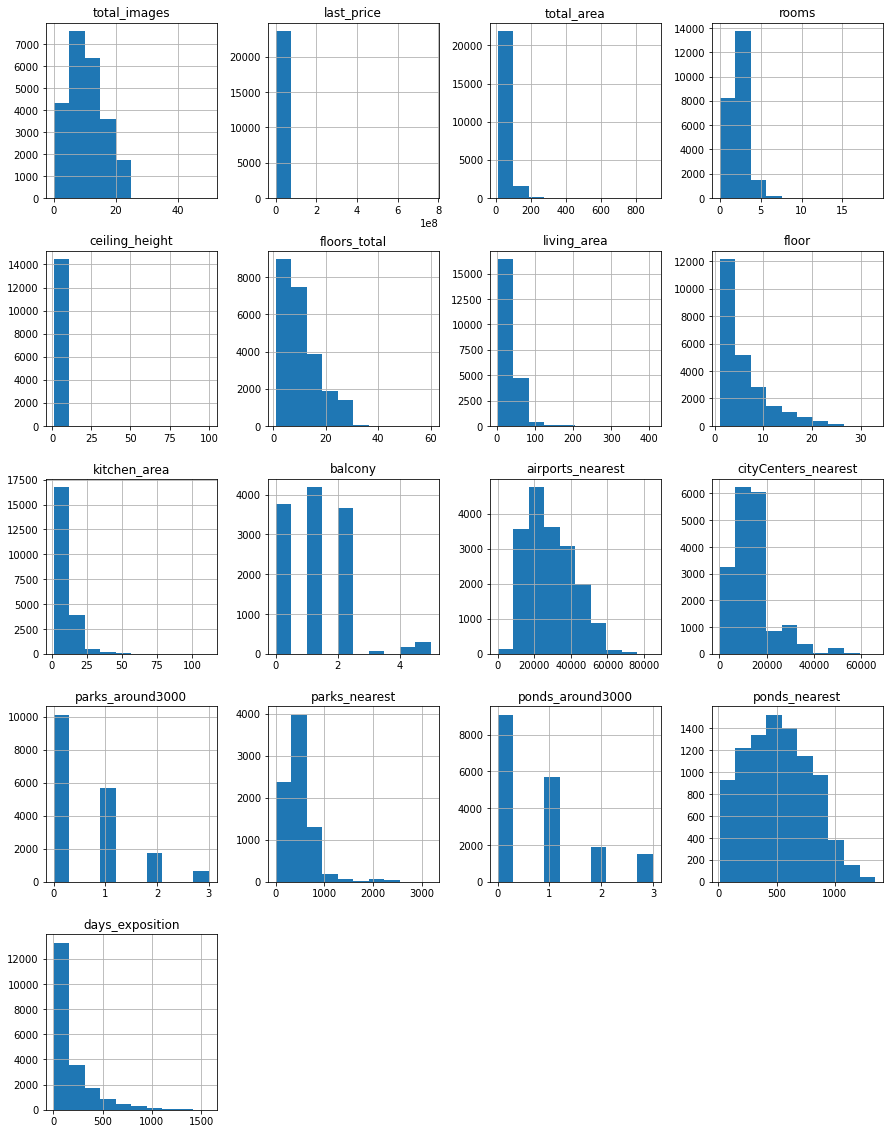

In [5]:
#выведем в виде гистрограмм
data.hist(figsize=(15, 20));

In [6]:
# можно вывести количество значений определенного столбца в порядке убывания
print(data['ceiling_height'].value_counts())
# или его пределы. Интересно, в каком здании высота потолков достигает 100 метров? 
print(data['ceiling_height'].min(), data['ceiling_height'].max()) 
#data['ceiling_height'].hist(figsize=(30, 10))

2.50     3515
2.60     1646
2.70     1574
3.00     1112
2.80      993
         ... 
4.25        1
3.39        1
3.93        1
10.30       1
4.65        1
Name: ceiling_height, Length: 183, dtype: int64
1.0 100.0


In [7]:
# выведем еще дополнительную информацию
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


In [8]:
# Дубликатов нет
data.duplicated().sum()
#data['is_apartment'].unique()

0

### Предобработка данных

2.1. Найдите и изучите пропущенные значения в столбцах:
o Определите, в каких столбцах есть пропуски.
o Заполните пропущенные значения там, где это возможно. Например, если продавец не указал число балконов, то, скорее всего, 
в его квартире их нет. Такие пропуски правильно заменить на 0. Если логичную замену предложить невозможно, то оставьте эти 
значения пустыми. Пропуски — тоже важный сигнал, который нужно учитывать.
o В ячейке с типом markdown укажите причины, которые могли привести к пропускам в данных.

In [9]:
# Выведём количество пропущенных значений для каждого столбца.
print(data.isna().sum())
#print(data['balcony'])

# Сразу удаляю строки с пустыми значениями - без населённого пункта 
data =  data.dropna(subset=['locality_name'])
#print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


In [10]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind= 'barh', figsize=(19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) ')

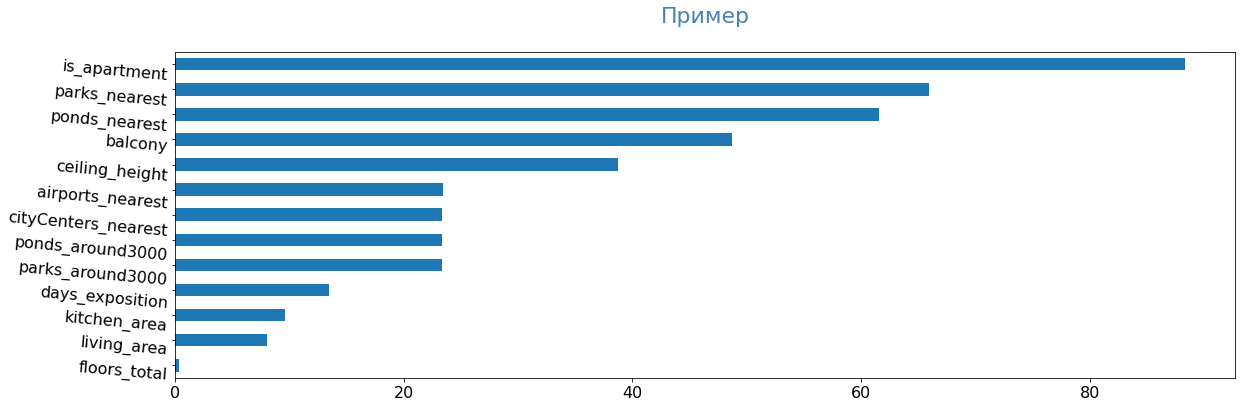

In [11]:
pass_value_barh(data)

In [12]:
# Первое замечание.
# После заполнения синтетическими данными столбцов, стоит провести проверку на корректность значений всех наших площадей, 
# т.к. есть (коридоры, сан.узлы, балконы)
#     total_area*0.9 <= (living_area + kitchen_area)
# если алгоритм приводит к появлению аномалий, стоит подумать над его содержимым

#Было
# что делать с пропусками в жилой площади -  остальное заполняем медианой по населённому пункту
# living_area жилая площадь в квадратных метрах (м²) 
data['living_area']=data['living_area'].fillna(data['living_area'].median())
pass_value_barh(data['living_area'])

# kitchen_area площадь кухни в квадратных метрах (м²) - для отсутствующих значений возьмем среднее 10.6 
data['kitchen_area']=data['kitchen_area'].fillna(10.6)
pass_value_barh(data['kitchen_area'])

# Добавил
# total_area*0.9 <= (living_area + kitchen_area)
# data['total_area_09'] = data['total_area']*0.9
# data['check']= data['kitchen_area']+data['living_area']
# area_chek = data.query('total_area_09 <= check') #.sortvalues('flat_class')
#data.drop(data.loc[data['total_area_09']<=data['check']].index, inplase=True)
#print(data.isna().sum())

пропусков не осталось :) 
пропусков не осталось :) 


In [13]:
# Второе замечание. 
# После заполнения синтетическими данными, стоит провести проверку на корректность значений по 
# условию (этажность дома не м.б. ниже этажности квартиры)
# ['floors_total'] < ['floor']

# Первоначально было
# floors_total всего этажей в доме. Пропуски логично заменить на 1. 
data['floors_total'] = data['floors_total'].fillna(1)

# Потом добавил
pass_value_barh(data['floors_total'])
#print(data.query('floors_total < floor').info())
# data = data.query('(ceiling_height > 2.4 & ceiling_height < 5) & last_price > 400000 & rooms <= 10 & total_area < 600')

пропусков не осталось :) 


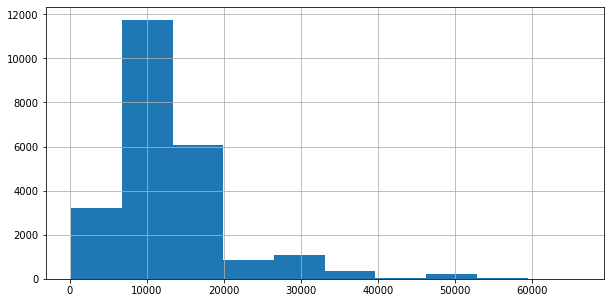

In [14]:
# Третье замечание. 
# Не изучено распределение пропусков по городам до заполнения значений в ['city_сenters_nearest']
# к каким населенным пунктам относятся и оценить степень влияния пропусков на дальнейший анализ (будут мешать или нет)

# 1. По пропускам в столбцах «nearest» мы их никак не заполняем. Это картографические данные, которые если мы 
# заполним медианой то получим искаженные данные. Никак их не трогаем.

# расстояние до центра города (м)
# было data['cityCenters_nearest']=data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())

data['cityCenters_nearest']=data['cityCenters_nearest'].groupby(data['locality_name']).fillna(data['cityCenters_nearest'].median())
data['cityCenters_nearest'].hist(figsize=(10, 5));

In [15]:
# заполним пропуски высоты потолков медианным значением
data['ceiling_height']=data['ceiling_height'].fillna(data['ceiling_height'].median())

# is_apartment это булев тип. Заменяем на ложь
data['is_apartment'] = data['is_apartment'].fillna(False)
#data['is_apartment'] = data['is_apartment'].fillna(value=False) - не работает
#data['is_apartment'] = data['is_apartment'].where((data.is_apartment == 0), False, data.is_apartment) - не работает
for t in data['is_apartment'].unique():
    data.loc[data['is_apartment']==0]=data.loc[data['is_apartment']==False]
    
# если продавец не указал число балконов, то, скорее всего, в его квартире их нет. Такие пропуски правильно заменить на 0
# balcony  
data['balcony']=data['balcony'].fillna(value=0)

# Slack: Можно заменить медианой по всему датасету. Это не сильно важные параметры, не нужно тратить на них много времени.
# Разве что для расстояния до центра можно сделать заполнение с группировкой по населенному пункту.

# расстояние до ближайшего аэропорта в метрах (м)
data['airports_nearest']=data['airports_nearest'].fillna(data['airports_nearest'].median())

# число парков в радиусе 3 км
data['parks_around3000']=data['parks_around3000'].fillna(data['parks_around3000'].median())
# расстояние до ближайшего парка (м)
data['parks_nearest']=data['parks_nearest'].fillna(data['parks_nearest'].median())
# число водоёмов в радиусе 3 км
data['ponds_around3000']=data['ponds_around3000'].fillna(data['ponds_around3000'].median())
# расстояние до ближайшего водоёма (м)
data['ponds_nearest']=data['ponds_nearest'].fillna(data['ponds_nearest'].median())

print(data.isna().sum())

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3180
dtype: int64


<AxesSubplot:>

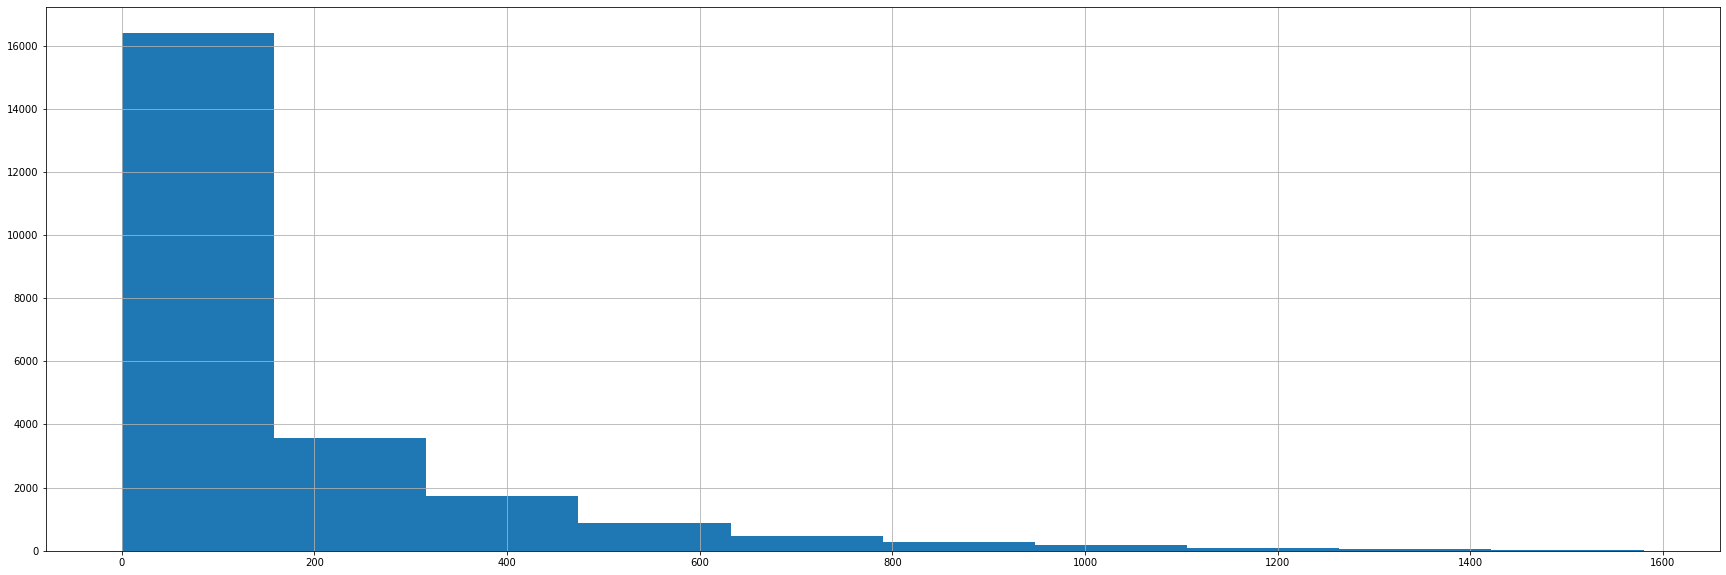

In [16]:
# days_exposition - сколько дней было размещено объявление (от публикации до снятия)
#data['first_day_exposition'].hist(figsize=(30, 10))
data['days_exposition']=data['days_exposition'].fillna(value=0)
data['days_exposition'].hist(figsize=(30, 10))
# Slack: Вижу прямую взаимосвязь пропусков с датой публикации, предполагаю, что это квартиры, которые не продали.
# Пропуски в days_exposition можно не заполнять, достаточно исследовать как они распределены относительно даты 
# публикации и составить гипотезу о том, как они появляются.
# Пропуск решил заполнить нулем. 

In [17]:
# посмотрим как теперь выглядят данные
data.sample(10)
# можно и распределение посмотреть
#data['is_apartment'].unique()
#data['balcony'].value_counts().sort_values()
#data['floor'].value_counts().sort_values()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20698,10,3400000.0,32.00,2017-09-02T00:00:00,1,2.60,9.0,17.9,6,False,...,6.3,0.0,Санкт-Петербург,45014.0,17252.0,0.0,454.5,0.0,502.0,89.0
12223,20,59000000.0,127.50,2017-01-24T00:00:00,4,3.00,12.0,85.0,8,False,...,13.0,4.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,5.0
1269,12,7000000.0,53.70,2017-09-27T00:00:00,2,2.65,12.0,28.6,11,False,...,15.7,2.0,Санкт-Петербург,26766.0,10939.0,1.0,524.0,1.0,913.0,60.0
4044,7,3250000.0,32.60,2018-08-27T00:00:00,1,2.65,25.0,16.0,16,False,...,8.2,0.0,посёлок Шушары,13908.0,19694.0,0.0,454.5,1.0,645.0,63.0
4400,4,12300000.0,78.65,2017-09-09T00:00:00,3,2.65,5.0,48.0,1,False,...,11.0,0.0,Пушкин,14567.0,26720.0,2.0,403.0,0.0,502.0,4.0
23518,1,6200000.0,55.00,2017-12-16T00:00:00,2,3.00,6.0,32.2,2,False,...,8.4,0.0,Санкт-Петербург,16245.0,7776.0,0.0,454.5,0.0,502.0,47.0
12241,10,4100000.0,40.00,2017-09-26T00:00:00,2,3.03,5.0,29.1,1,False,...,6.5,0.0,Санкт-Петербург,30942.0,5839.0,0.0,454.5,1.0,919.0,181.0
14848,17,3500000.0,32.80,2017-10-11T00:00:00,1,2.50,9.0,17.4,4,False,...,8.1,0.0,Санкт-Петербург,47981.0,16106.0,0.0,454.5,0.0,502.0,327.0
18813,12,8488000.0,72.00,2018-12-15T00:00:00,3,2.65,13.0,43.0,3,False,...,8.5,0.0,Санкт-Петербург,10958.0,13427.0,0.0,454.5,0.0,502.0,0.0
18004,12,4300000.0,62.00,2017-12-11T00:00:00,2,2.65,16.0,30.0,2,False,...,10.6,0.0,Всеволожск,26756.5,13105.0,0.0,454.5,1.0,502.0,43.0


2.2.	Рассмотрите типы данных в каждом столбце:
o	Найдите столбцы, в которых нужно изменить тип данных.
o	Преобразуйте тип данных в выбранных столбцах.
o	В ячейке с типом markdown поясните, почему нужно изменить тип данных.

Этажи и балконы имеют целые значения, им можно присвоить int
Число парков и число водоемов в радиусе 3 км тоже целочисленный тип

In [18]:
# попытка сделать через цикл for 
#for x in ['floors_total', 'balcony', 'parks_around3000','ponds_around3000']:
#    data[x].astype('int', errors='ignore')
    
data['floors_total']=data['floors_total'].astype('int')
data['balcony']=data['balcony'].astype('int')
data['parks_around3000']=data['parks_around3000'].astype('int', errors='ignore')
data['ponds_around3000']=data['ponds_around3000'].astype('int', errors='ignore')
data.info() 
# data['floors_total'] = data['floors_total'].astype(int, errors='ignore')#.to_frame()
#data['floors_total'].unique()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  int64  
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [19]:
# дату публикации поменяем
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format="%Y-%m-%dT%H:%M:%S")
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
20065,9,4840000.0,44.0,2017-06-08,2,2.55,5,28.0,2,False,...,5.5,1,Санкт-Петербург,10635.0,9892.0,2,416.0,0,502.0,258.0
16889,20,23290000.0,139.8,2016-08-04,3,3.00,8,78.9,6,False,...,18.3,0,Санкт-Петербург,36998.0,9189.0,1,2409.0,3,195.0,0.0
16380,2,3100000.0,30.5,2018-11-21,1,2.50,5,18.0,2,False,...,6.0,0,Санкт-Петербург,24345.0,15424.0,0,454.5,0,502.0,27.0
23194,14,3900000.0,41.0,2017-09-19,1,2.75,17,20.0,16,False,...,8.0,0,Санкт-Петербург,17049.0,16956.0,0,454.5,1,755.0,126.0
11907,12,2600000.0,31.0,2017-03-21,1,2.65,4,16.7,4,False,...,5.3,1,Санкт-Петербург,17128.0,17036.0,0,454.5,1,860.0,209.0
21212,6,3950000.0,62.0,2016-08-05,2,2.65,9,34.0,2,False,...,11.3,0,посёлок Шушары,23592.0,29378.0,0,454.5,1,400.0,103.0
22281,10,11700000.0,92.0,2016-03-14,3,2.75,19,56.9,3,False,...,17.0,2,Санкт-Петербург,19174.0,7397.0,1,552.0,1,202.0,638.0
16753,20,6920000.0,56.4,2018-09-05,2,2.75,14,33.6,7,False,...,8.7,2,Санкт-Петербург,19403.0,14211.0,1,58.0,0,502.0,104.0
22882,5,4600000.0,46.0,2017-07-17,1,2.65,14,19.0,5,False,...,15.0,2,Санкт-Петербург,35723.0,16024.0,1,620.0,3,422.0,122.0
8071,0,2000000.0,52.0,2018-06-25,2,3.00,3,30.0,1,False,...,10.6,0,Волхов,26756.5,13105.0,0,454.5,1,502.0,33.0


2.3.	Изучите уникальные значения в столбце с названиями и устраните неявные дубликаты. Например, «поселок Рябово» и «поселок городского типа Рябово», «поселок Тельмана» и «посёлок Тельмана» — это обозначения одних и тех же населённых пунктов. Вы можете заменить названия в существующем столбце или создать новый с названиями без дубликатов.

In [20]:
# обработаем название населённого пункта

# приводим к нижнему регистру
data['locality_name'] = data['locality_name'].str.lower()
# Заменяем е на ё
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)
# заменяем 
data['locality_name'] = data['locality_name'].str.replace('поселок городского типа', 'городской поселок')
print(data['locality_name'].unique())

['санкт-петербург' 'поселок шушары' 'городской поселок янино-1'
 'поселок парголово' 'поселок мурино' 'ломоносов' 'сертолово' 'петергоф'
 'пушкин' 'деревня кудрово' 'коммунар' 'колпино'
 'городской поселок красный бор' 'гатчина' 'деревня федоровское' 'выборг'
 'кронштадт' 'кировск' 'деревня новое девяткино' 'поселок металлострой'
 'городской поселок лебяжье' 'городской поселок сиверский'
 'поселок молодцово' 'городской поселок кузьмоловский'
 'садовое товарищество новая ропша' 'павловск' 'деревня пикколово'
 'всеволожск' 'волхов' 'кингисепп' 'приозерск' 'сестрорецк'
 'деревня куттузи' 'поселок аннино' 'городской поселок ефимовский'
 'поселок плодовое' 'деревня заклинье' 'поселок торковичи'
 'поселок первомайское' 'красное село' 'поселок понтонный' 'сясьстрой'
 'деревня старая' 'деревня лесколово' 'поселок новый свет' 'сланцы'
 'село путилово' 'ивангород' 'мурино' 'шлиссельбург' 'никольское'
 'зеленогорск' 'сосновый бор' 'деревня оржицы' 'деревня кальтино'
 'кудрово' 'поселок романовка'

In [21]:
# check
data['locality_name'].nunique()

323

2.4.	Найдите и устраните редкие и выбивающиеся значения. Например, в столбце ceiling_height может быть указана высота потолков 25 м и 32 м. Логично предположить, что на самом деле это вещественные значения: 2.5 м и 3.2 м. Попробуйте обработать аномалии в этом и других столбцах.
o	Если природа аномалии понятна и данные действительно искажены, то восстановите корректное значение.
o	В противном случае удалите редкие и выбивающиеся значения.
o	В ячейке с типом markdown опишите, какие особенности в данных вы обнаружили.


2.65     9836
2.50     3522
2.60     1646
2.70     1580
3.00     1109
         ... 
3.76        1
10.00       1
2.49        1
2.89        1
4.65        1
Name: ceiling_height, Length: 178, dtype: int64


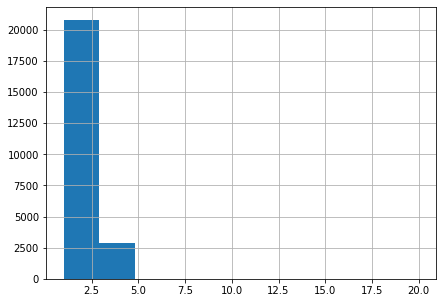

In [22]:
# ceiling_height высота потолков выше 21 метра вряд ли бывает. Уменьшим на 10. 
data.loc[(data['ceiling_height'] >= 21), 'ceiling_height'] = data['ceiling_height']*0.1
         
print(data['ceiling_height'].value_counts())
data['ceiling_height'].hist(figsize=(7, 5));

In [23]:
print(data['ceiling_height'].unique())

[ 2.7   2.65  3.03  2.5   2.67  2.56  3.05  2.75  2.6   2.9   2.8   2.55
  3.    3.2   2.61  3.25  3.45  2.77  2.85  2.64  2.57  4.15  3.5   3.3
  2.71  4.    2.47  2.73  2.84  3.1   2.34  3.4   3.06  2.72  2.54  2.51
  2.78  2.76  2.58  3.7   2.52  5.2   2.87  2.66  2.59  2.    2.45  3.6
  2.92  3.11  3.13  3.8   3.15  3.55  3.16  3.62  3.12  2.53  2.74  2.96
  2.46  5.3   5.    2.79  2.95  4.06  2.94  3.82  3.54  3.53  2.83  4.7
  2.4   3.38  3.01  5.6   3.65  3.9   3.18  3.35  2.3   3.57  2.48  2.62
  2.82  3.98  2.63  3.83  3.52  3.95  3.75  2.88  3.67  3.87  3.66  3.85
  3.86  4.19  3.24  4.8   4.5   4.2   3.36  3.08  3.68  3.07  3.37  3.09
  8.    3.26  3.34  2.81  3.44  2.97  3.14  4.37  2.68  3.22  3.27  4.1
  2.93  3.46  2.4   3.47  3.33  3.63  3.32  1.2   8.3   2.98  2.86  3.17
  4.4   3.28  3.04  4.45  5.5   3.84  3.23  3.02  3.21  3.43  3.78  4.3
  3.39  2.69  3.31  4.65  3.56  2.2   3.51  3.93  3.42  2.99  3.49 14.
  4.14  2.91  3.88  1.75  4.25  3.29 20.    2.25  3.76  3.

In [24]:
# check
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23650 non-null  float64       
 6   floors_total          23650 non-null  int64         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

In [25]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир
# сырые данные

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"23,650.00","23,650.00","23,650.00","23,650.00","23,650.00","23,650.00","23,650.00","23,650.00","23,650.00"
min,0.00,12.00,1.00,0.00,"12,190.00",2.00,1.30,1.00,1.00
max,19.00,900.00,20.00,"1,580.00","763,000,000.00",409.70,112.00,33.00,60.00


<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />Для выполнения пункта 2.4. существует два подхода
        
Можно механически бороться с выбросами, ...
               
основная проблема такого подхода — не учитывается неоднородность нашей выборки: у нас здесь и малые поселки, и вторая столица страны, и исторический фонд и массовая застройка, и однушки и довольно большое кол-во многокомнатных квартир, или наоборот одна две квартиры с количеством комнат больше 7-ми ...
        

        
если бы у нас в таблице были бы только однокомнатные квартиры из определенного района массовой застройки, тогда да, мы бы боролись с выбросами традиционными способами, при нашем многообразии населенных пунктов, многокомнатности такие подходы не работают... т.е. они работают, но это усложнит наш проект — придется разбить и объединить записи нашей таблицы по нескольким параметрам (кол-во комнат, район, и т.д.), а затем только выполнять все остальные пункты на каждой отдельной выборке
        
Остается другой подход — убираем редкие значения и следим за количеством потерь... 
         
Для выборки из 23-х тысяч значений, 4 записи со стоимостью квадратного метра выше 10 млн. руб., довольно редкое явление

Хороший пример, высота потолков, которую мы отрезаем по нижней и верхней планке, это скорее аномальные записи, посмотрим на другой аспект — на редкости: кол-во комнат

__т.е. мы не говорим о том, что квартир с кол-ом комнат выше 7 не бывает, мы говорим, что для нашего исследования это редкие выбивающиеся из общей картины уникальные объекты, по которым необходимо проводить отдельную работу ...__
        
подобным образом рассматриваем и остальные параметры
        
наши помощники
        
1. гистограммы, с хорошим масштабом
2. метод describe() или облегченная версия, пример выше
3. метод value_counts()
        
плюс жизненный опыт 

In [26]:
# check
data.rooms.value_counts().to_frame()

,rooms
1,8036
2,7924
3,5797
4,1175
5,326
0,197
6,105
7,59
8,12
9,8


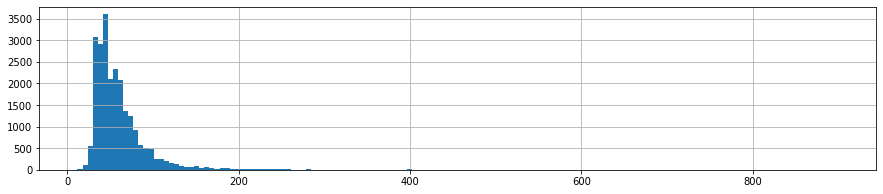

In [27]:
# check
data.total_area.hist(bins = 150, figsize = (15,3));

<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера</b></font>
    <br /> 
    <font size="3", color = "black">
<br />т.е. все квартиры более двухсот квадратных метров можно считать редкостями
        
особенно это заметно на втором графике, где мы подробно рассматриваем промежуток от 180 кв. метров до 500

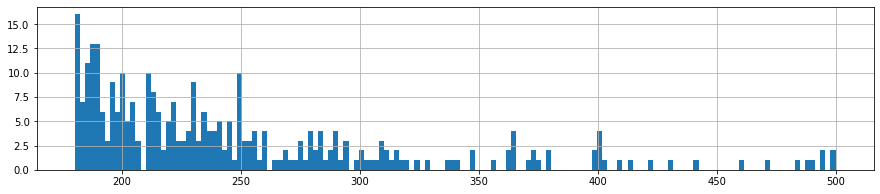

In [28]:
# check
data.total_area.hist(bins = 150, figsize = (15,3), range = (180,500));

In [29]:
# check
data.total_area.value_counts(bins =20)

(11.111, 56.4]    13529
(56.4, 100.8]      8323
(100.8, 145.2]     1165
(145.2, 189.6]      368
(189.6, 234.0]      119
(234.0, 278.4]       61
(278.4, 322.8]       37
(322.8, 367.2]       14
(367.2, 411.6]       14
(456.0, 500.4]        9
(411.6, 456.0]        4
(589.2, 633.6]        4
(500.4, 544.8]        2
(855.6, 900.0]        1
(544.8, 589.2]        0
(633.6, 678.0]        0
(678.0, 722.4]        0
(722.4, 766.8]        0
(766.8, 811.2]        0
(811.2, 855.6]        0
Name: total_area, dtype: int64

In [30]:
# check

# Значения параметров объектов недвижимости на разных квантилях

(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .9976])  
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.01,1.00,25.17,2.50,0.00,"1,000,000.00",13.00,5.00,1.00,2.00
0.5,2.00,52.00,2.65,73.00,"4,650,000.00",30.00,10.00,4.00,9.00
0.9,3.00,93.50,3.00,425.00,"10,900,000.00",53.71,15.10,13.00,22.00
0.9976,7.00,309.77,4.00,"1,280.24","82,000,000.00",180.00,50.00,25.00,27.00


<div class="alert alert-success">
<font size="4", color= "seagreen"><b>✔️ Комментарий ревьюера </b></font>
    <br /> 
    <font size="3", color = "black">
<br />Квантили что это такое
        
https://fin-accounting.ru/cfa/l1/quantitative/cfa-quartiles-quintiles-deciles-percentiles?ysclid=l7gy2kky4i156375632
        
они помогают увидеть редкости и аномалии в данных

In [31]:
data = data.loc[data['rooms']<8]
data = data.loc[data['rooms']>0]
data = data.loc[data['total_area']<300]

data = data.loc[data['ceiling_height']<5]
data = data.loc[data['ceiling_height']>2]

data = data.loc[data['living_area']<180]

data = data.loc[data['kitchen_area']<22]
data = data.loc[data['kitchen_area']>3]
#print(data.shape[0])
(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  
        'kitchen_area', 'floor',   'floors_total']]
    .quantile([0.01, .5, .90, .9976])  
    .style.format("{:,.2f}")
)

# data.total_area.value_counts(bins =20)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
0.01,1.00,27.00,2.50,0.00,"1,000,000.00",13.32,5.00,1.00,2.00
0.5,2.00,51.00,2.65,73.00,"4,550,000.00",30.00,9.60,4.00,9.00
0.9,3.00,87.30,2.95,419.00,"9,700,000.00",51.60,14.00,13.00,22.00
0.9976,6.00,201.50,4.00,"1,278.01","45,900,720.00",126.40,21.10,25.00,27.00


In [32]:
# check

# Показатели о кол-ве объявлений в датасете, минимальных и максимальных значениях 
# в выбранных параметрах о продаже квартир


(
    data[['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area',
          'floor', 'floors_total']]
    .apply (['count', 'min', 'max'])   
    .style.format("{:,.2f}")
)

,rooms,total_area,ceiling_height,days_exposition,last_price,living_area,kitchen_area,floor,floors_total
count,"22,498.00","22,498.00","22,498.00","22,498.00","22,498.00","22,498.00","22,498.00","22,498.00","22,498.00"
min,1.00,12.00,2.20,0.00,"430,000.00",2.00,3.20,1.00,1.00
max,7.00,295.00,4.80,"1,580.00","159,984,000.00",177.00,21.90,33.00,60.00


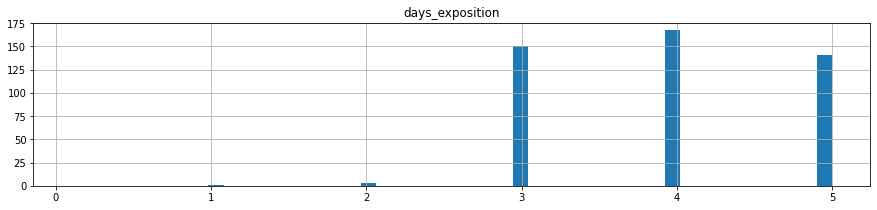

In [33]:
# check
data.hist(column = 'days_exposition', bins = 50, figsize = (15,3), range = (0.1,5));

In [34]:
# Черновик Работа с редкими и выбивающимися значениями
# 'rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floors_total'

# Функция для подсчёта границ с учетом 1.5 размаха
# def quartile_range(df, column):
#     q1 = df[column].quantile(0.25)
#     q3 = df[column].quantile(0.75)
#     iqr = q3 - q1
#     dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
#     return dfq
# Столбцы с выбросами
# list_features = ['rooms', 'total_area', 'ceiling_height', 'days_exposition', 'last_price', 'living_area',  'kitchen_area', 'floors_total']
# for col in list_features:
#     data[col] = quartile_range(data, col)

# Изучаем, есть ли выбивающиеся значения
# data.describe()

### Посчитайте и добавьте в таблицу новые столбцы

•	цена одного квадратного метра;

•	день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);

•	месяц публикации объявления;

•	год публикации объявления;

•	тип этажа квартиры (значения — «‎первый», «последний», «другой»);

•	расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).

In [35]:
# Добавляем столбец со стоимостью квадратного метра (one_m_price) и приводим его в целочисленный тип
data['one_m_price'] = data['last_price'] / data['total_area']
data['one_m_price'] = data['one_m_price'].astype(int)

# Добавляем столбцы дня недели, месяца и года
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

# Создаём функцию для заполнения нового столбца с типом этажа
def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)

# расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
data['cityCenters_nearest'] = data['cityCenters_nearest'] / 1000
data['cityCenters_nearest'] = data['cityCenters_nearest'].astype(int)
print(data['cityCenters_nearest'].max())
data.sample(10)

65


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,one_m_price,weekday,month,year,floor_type
5643,17,4100000.0,44.0,2019-03-28,2,2.60,5,28.0,1,False,...,2,591.0,0,502.0,0.0,93181,3,3,2019,первый
7874,6,12870000.0,68.6,2017-04-24,2,3.10,10,36.0,3,False,...,0,454.5,2,356.0,224.0,187609,0,4,2017,другой
2567,0,3700000.0,43.6,2017-07-19,1,2.65,17,16.4,8,False,...,0,454.5,1,1036.0,69.0,84862,2,7,2017,другой
13326,5,2000000.0,39.0,2019-01-09,1,2.65,5,17.5,5,False,...,0,454.5,1,502.0,34.0,51282,2,1,2019,последний
4947,9,2750000.0,38.7,2018-11-21,1,2.65,9,17.8,3,False,...,0,454.5,1,502.0,0.0,71059,2,11,2018,другой
8713,16,7500000.0,56.0,2019-03-22,2,4.00,4,34.0,3,False,...,0,454.5,3,650.0,0.0,133928,4,3,2019,другой
3246,16,5099000.0,51.2,2018-02-08,2,2.50,5,30.1,4,False,...,1,379.0,1,486.0,110.0,99589,3,2,2018,другой
4060,0,1240000.0,30.0,2018-03-09,1,2.65,5,30.0,2,False,...,0,454.5,1,502.0,37.0,41333,4,3,2018,другой
6434,14,2967000.0,36.0,2016-12-28,1,2.65,24,30.0,16,False,...,0,454.5,1,502.0,314.0,82416,2,12,2016,другой
8746,11,5750000.0,77.7,2015-10-27,3,2.65,9,51.9,3,False,...,0,454.5,0,502.0,364.0,74002,1,10,2015,другой


### Проведите исследовательский анализ данных

#### 	Изучите следующие параметры объектов:

- общая площадь;
жилая площадь;
площадь кухни;

- цена объекта;
количество комнат;
высота потолков;

- этаж квартиры;
тип этажа квартиры («первый», «последний», «другой»);
общее количество этажей в доме;

- расстояние до центра города в метрах;
расстояние до ближайшего аэропорта;
расстояние до ближайшего парка;

- день и месяц публикации объявления.

Постройте отдельные гистограммы для каждого из этих параметров. Опишите все ваши наблюдения по параметрам в ячейке с типом markdown.


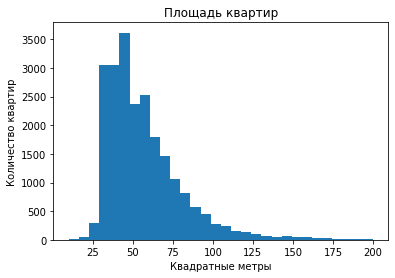

Наибольшие по площади варианты:
10181    295.00
15017    293.60
18832    284.00
5534     283.00
5631     280.00
7274     280.00
1808     274.65
3267     266.20
9433     260.00
12067    259.60
Name: total_area, dtype: float64


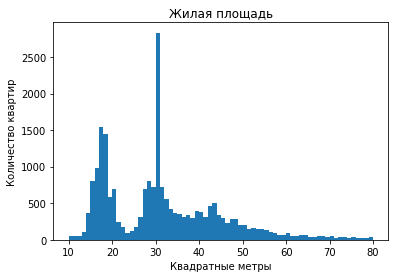

Наибольшие по жилой площади варианты:
5534     177.0
8634     175.0
7658     174.3
7997     167.0
21676    164.7
22965    164.3
12522    160.0
5631     160.0
16141    160.0
22904    159.6
Name: living_area, dtype: float64


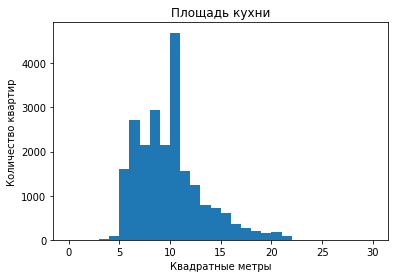

Наибольшие по площади кухни варианты:
13776    21.90
3290     21.90
16959    21.90
19424    21.90
11158    21.90
3065     21.87
13818    21.82
6149     21.80
8050     21.80
11835    21.80
Name: kitchen_area, dtype: float64


In [36]:
# Общая площадь
plt.hist(data['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади варианты:')
print(data['total_area'].sort_values(ascending=False).head(10))

# Жилая площадь
plt.hist(data['living_area'], bins=70, range=(10,80))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по жилой площади варианты:')
print(data['living_area'].sort_values(ascending=False).head(10))

# Площадь кухни
plt.hist(data['kitchen_area'], bins=30, range=(0,30))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по площади кухни варианты:')
print(data['kitchen_area'].sort_values(ascending=False).head(10))

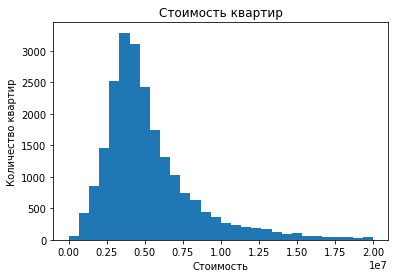

Наибольшие по цене варианты:
2536     159984000.0
12674    140000000.0
13864    130000000.0
4996     124000000.0
5631      99000000.0
16590     98000000.0
509       90000000.0
5534      87000000.0
11430     85000000.0
10362     83820000.0
Name: last_price, dtype: float64


In [37]:
# цена объекта
plt.hist(data['last_price'], bins=30, range=(0,20000000))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()
print('Наибольшие по цене варианты:')
print(data['last_price'].sort_values(ascending=False).head(10))

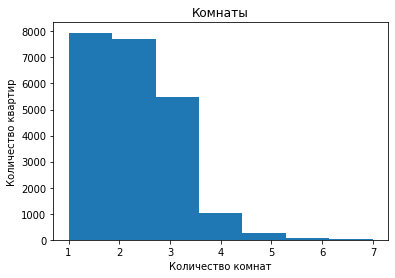

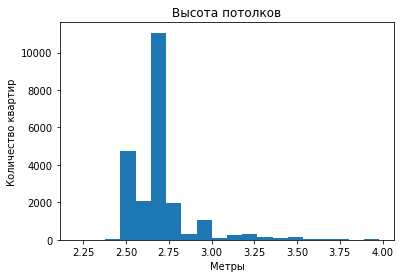

In [38]:
# количество комнат
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()
#print('Наибольшие по числу комнат варианты:')
#print(data['rooms'].sort_values(ascending=False).head(10))

# Высота потолков
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()
#print('Наибольшие по высоте потолков варианты:')
#print(data['ceiling_height'].sort_values(ascending=False).head(10))

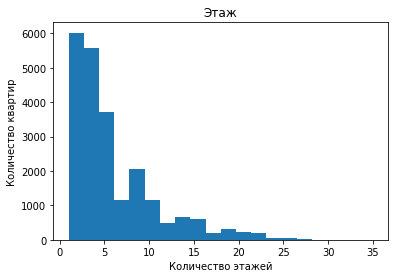

In [39]:
# этаж квартиры; 'floor'
plt.hist(data['floor'], bins=20, range=(1,35))
plt.title('Этаж')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()
#print('Наибольшие по числу этажей варианты:')
#print(data['floor'].sort_values(ascending=False).head(10))

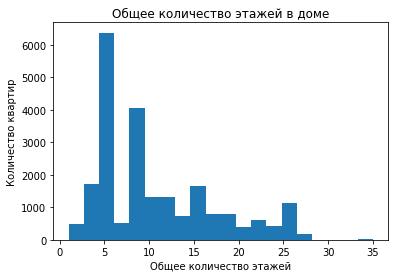

In [40]:
# общее количество этажей в доме; floors_total
plt.hist(data['floors_total'], bins=20, range=(1,35))
plt.title('Общее количество этажей в доме')
plt.xlabel('Общее количество этажей')
plt.ylabel('Количество квартир')
plt.show()
#print('Наибольшие по числу этажей варианты:')
#print(data['floor'].sort_values(ascending=False).head(10))

<AxesSubplot:>

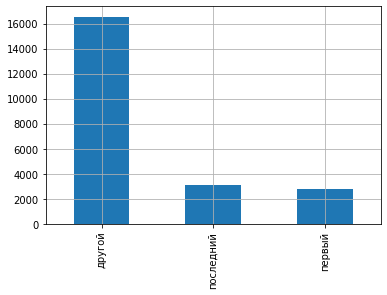

In [41]:
# тип этажа квартиры («первый», «последний», «другой»); 'floor_type'
data['floor_type'].value_counts().plot(kind='bar', grid=True)


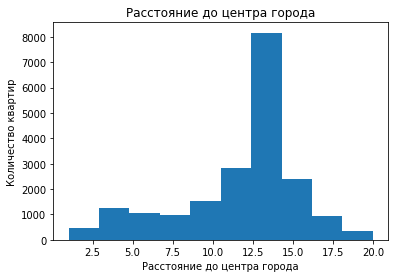

In [42]:
# расстояние до центра города в метрах; 
plt.hist(data['cityCenters_nearest'], bins=10, range=(1,20))
plt.title('Расстояние до центра города')
plt.xlabel('Расстояние до центра города')
plt.ylabel('Количество квартир')
plt.show()
#print('Наиболее удаленные варианты:')
#print(data['rooms'].sort_values(ascending=False).head(10))

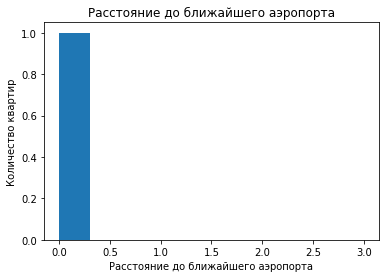

In [43]:
# расстояние до ближайшего аэропорта; 
plt.hist(data['airports_nearest'], bins=10, range=(0,3))
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние до ближайшего аэропорта')
plt.ylabel('Количество квартир')
plt.show()
#print('Наиболее удаленные варианты:')
#print(data['airports_nearest'].sort_values(ascending=False).head(10))

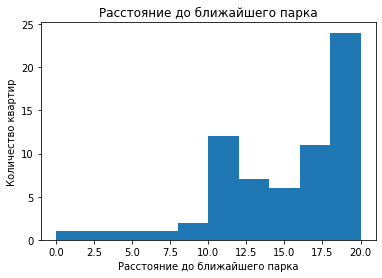

In [44]:
# расстояние до ближайшего парка;
plt.hist(data['parks_nearest'], bins=10, range=(0,20))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество квартир')
plt.show()
#print('Наиболее удаленные варианты:')
#print(data['parks_nearest'].sort_values(ascending=False).head(10))

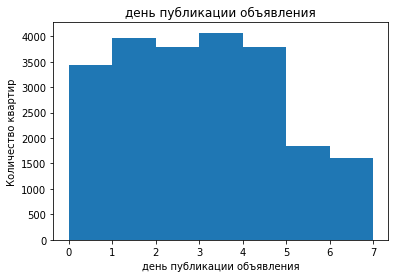

In [45]:
# день публикации объявления.
plt.hist(data['weekday'], bins=7, range=(0,7))
plt.title('день публикации объявления')
plt.xlabel('день публикации объявления')
plt.ylabel('Количество квартир')
plt.show()

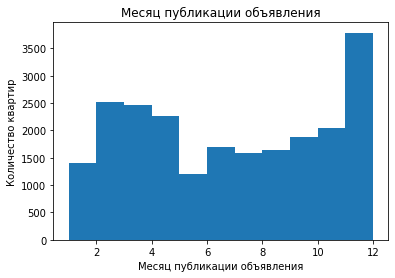

In [46]:
# месяц публикации объявления.
plt.hist(data['month'], bins=[1,2,3,4,5,6,7,8,9,10,11,12], range=(0,12))
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц публикации объявления')
plt.ylabel('Количество квартир')
plt.show()

Вывод

Площадь
Большинство квартир - менее 100 квадратных метров, больше площадь практически не встречается. В подборке есть несколько очень больших и странных вариантов с площадью более 200 квадратных метров. Квартира площадью 900 квадратных метров это, наверное, Эрмитаж. 

Самое распространенное значение жилой площади – 31 квадратный метр. Несколько пиков вызваны вероятно, тем, что это жилые площади для 1-комнатной, затем для 2-комнатной и после этого для 3-комнатной квартиры. После 80 метров встречаются единичные случаи
По площади кухни очень много вариантов от 5 до 10 метров – возможно, в выборке много хрущевок. Больше 20 метров кухни встречаются мало. Больше 30 - единичные случаи.

Стоимость
В основном стоимость квартир - порядка 4 миллионов. Больше 20 миллионов вариантов мало, и они выглядят очень странно и некоторые - на порядок дороже.
Комнаты
В основном квартиры состоят из 1, 2 и 3 комнат. Есть определенная доля 4-комнатных квартир. Варианты, где больше 7 комнат выглядят странно. Возможно, это отдельный дом.
Высота потолков
Большинство вариантов имеют высоту потолков от 2,5 до 2,8 метров. 

Наиболее распространенные этажи квартиры представлены в диапазоне от 1 до 5; 
Наиболее распространенные варианты находятся в пятиэтажках и девятиэтажках. 
Тип этажа квартиры в основном представлен не «первый» и не «последний».  

Расстояния
Наиболее распространенное расстояние до центра города 13 км; 
В расстояниях до ближайшего аэропорта очень много нулевых значений. Возможно, эти данные были заполнены некорректно.  
В расстояниях до ближайшего парка наиболее распространенные значения расположились от 18 до 20 км. Возможно, эти данные вычислялись некорректно – учитывались только самые распространенные парки. 

День и месяц публикации объявления.
Самые распространенные дни публикаций – рабочие. В субботу и воскресенье размещение объявлений происходило практически в два раза реже. 
Самые распространенные месяцы публикаций – ноябрь и декабрь. 

Самый распространенный месяц публикаций – декабрь.

#### Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней было размещено каждое объявление.
- Постройте гистограмму.
- Посчитайте среднее и медиану.
В ячейке типа markdown опишите, сколько времени обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?


Время продажи (медиана): 73.0
Время продажи (среднее): 155.07929593741665


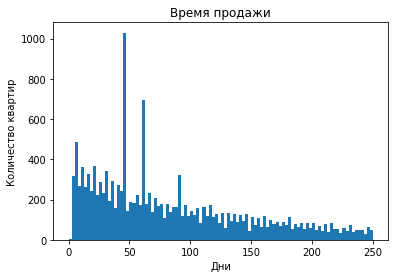

count    19557.000000
mean       178.400266
std        217.118632
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [47]:
#days_exposition
print('Время продажи (медиана):', data['days_exposition'].median())
print('Время продажи (среднее):', data['days_exposition'].mean())
# Гистограма времени продажи
plt.hist(data.query('days_exposition != 0')['days_exposition'], bins=100, range=(0,250))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
# Изучаем значения срока продажи
data.query('days_exposition != 0')['days_exposition'].describe()

Вывод.

Медианное время продажи - 95 дней. Среднее время продажи - 181 день.
В основном квартиры продаются за срок в 100 дней. Есть большое число квартир, проданных всего за несколько дней после публикации. А также есть варианты, которые продавались несколько десятков месяцев.

Быстрой продажей можно назвать срок в 45 дней и меньше. Долгой продажей - 210 дней (7 месяцев) и дольше.

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition', 'one_m_price', 'weekday', 'month',
       'year', 'floor_type'],
      dtype='object')


count    19557.000000
mean       178.400266
std        217.118632
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

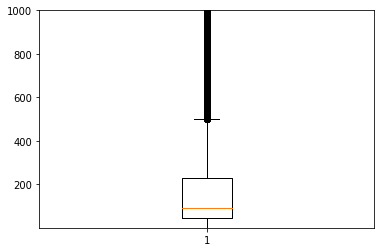

In [48]:
print(data.columns)

#диаграмма размаха
#plt.boxplot(data[data['days_exposition']!=0]['days_exposition'])
plt.boxplot(data.query('days_exposition != 0')['days_exposition'])
plt.ylim(1,1000)

#среднее значение, медиана и межквартильный размах
data[data['days_exposition']!=0]['days_exposition'].describe()
#data[data['days_exposition']!=0]['days_exposition'].value_counts()

####	Какие факторы больше всего влияют на общую (полную) стоимость объекта?

Изучите, зависит ли цена от:

- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.


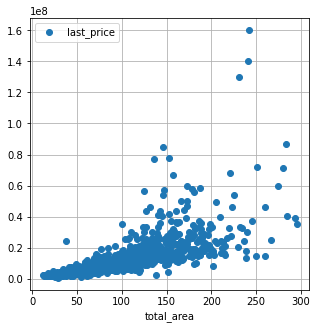

Корреляция цены и общей площади: 

            last_price  total_area
last_price     1.00000     0.89287
total_area     0.89287     1.00000 



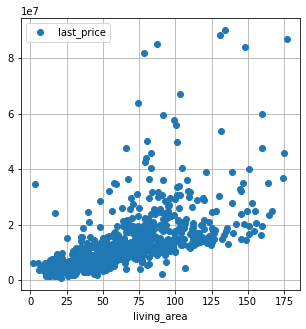

Корреляция цены и жилой площади: 

             last_price  living_area
last_price     1.000000     0.746904
living_area    0.746904     1.000000 



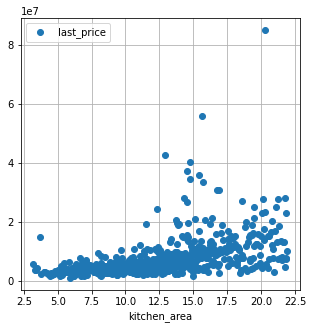

Корреляция цены и площади кухни: 

              kitchen_area  last_price
kitchen_area      1.000000    0.470304
last_price        0.470304    1.000000 



In [49]:


# Зависимость цены от площади
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и общей площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

# Зависимость цены от жилой площади
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и жилой площади:','\n')
print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')

# Зависимость цены от площади кухни kitchen_area
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и площади кухни:','\n')
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')

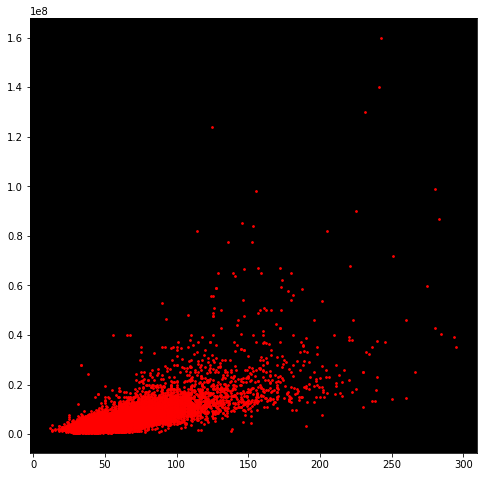

In [50]:
x = data['total_area']
y1 = data['last_price']
fig, ax = plt.subplots()
ax.scatter(x, y1,
           c = 'r', # [[0.1, 0.63, 0.55, 0.05]],
           s = 3)
fig.set_figwidth(8)
fig.set_figheight(8)
ax.set_facecolor('black')
plt.show()
# plot.scatter(0, 1, s=12, grid=True)

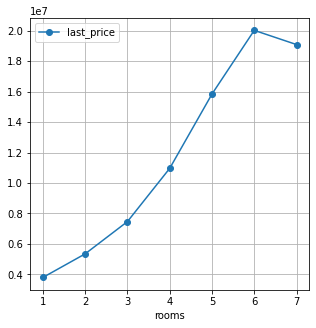

Корреляция цены и числа комнат: 

            last_price     rooms
last_price    1.000000  0.619526
rooms         0.619526  1.000000 



In [52]:
# Зависимость цены от числа комнат
(
    data.query('rooms > 0').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

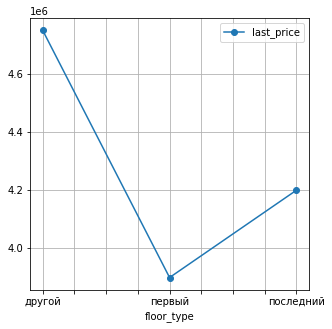

In [53]:
# Зависимость цены от этажа
(
    data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

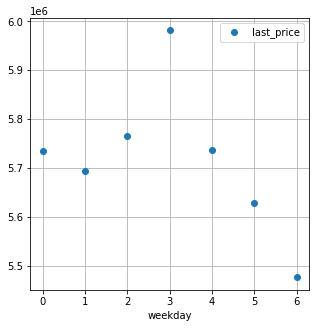

Корреляция цена-день недели: 

            last_price   weekday
last_price    1.000000  0.501144
weekday       0.501144  1.000000 



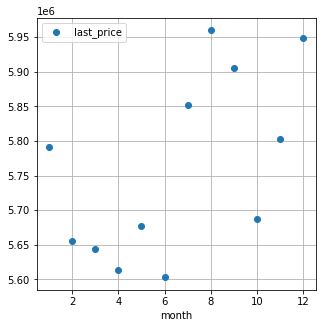

Корреляция цена-месяц размещения: 

            last_price    month
last_price     1.00000  0.01079
month          0.01079  1.00000 



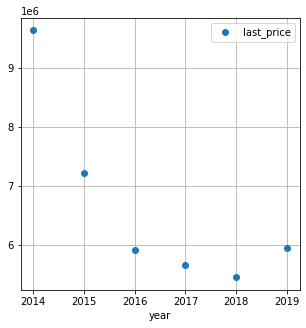

Корреляция цена-год размещения: 

            last_price      year
last_price    1.000000  0.054467
year          0.054467  1.000000 



In [54]:
# Зависимость цены от даты размещения (день недели
(
    data.pivot_table(index='weekday', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цена-день недели:','\n')
print(data.pivot_table(index='floor', values=['weekday', 'last_price']).corr(),'\n')

# Зависимость цены от даты размещения месяц
(
    data.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цена-месяц размещения:','\n')
print(data.pivot_table(index='floor', values=['month', 'last_price']).corr(),'\n')

# Зависимость цены от даты размещения год
(
    data.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цена-год размещения:','\n')
print(data.pivot_table(index='floor', values=['year', 'last_price']).corr(),'\n')

4.3. 
Выводы

Чем больше общая площадь, тем выше стоимость. Корреляция этих параметров крайне высокая. Почти такая же корреляция у жилой площади. Зависимость цены от площади кухни небольшая и линейная. 

Число комнат влияет на цену (больше комнат - больше цена), однако зависимость ниже, чем у площади. Можно сделать два вывода: бывают квартиры с большими по площади комнатами; квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко. 12-ти комнатные квартиры выставлялись в 4 раза дороже, чем остальные. 

Первый этаж непосредственно влияет на стоимость квартиры - в среднем квартиры на 1-м этаже значительно дешевле. Чуть дороже последний этаж. Наибольшая стоимость у квартир, расположенных не на 1-м и не на последнем этаже.

Зависимость цены от дня недели почти линейная - к концу недели стоимость размещения возрастает. Но в воскресенье -  наоборот, выставляется дешевле, чем в остальные дни. 

Зависимости цены от месяца размещения как таковой нет. В сентябре и в декабре стоимость размещения наиболее высокая. 

Зависимость цены от года размещения наблюдается обратная. Цена была наиболее высокой в 2014 году и до 2018 г снижалась. В 2019 г. цена стала немного повышаться. 

#### 	Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [55]:
#print(data['one_m_price'].max()) # 1907500
#print(data['one_m_price'].min()) # 111
# {:.0f} - количество знаков после запятой 
pd.set_option('display.float_format', '{:.0f}'.format)

data.groupby('locality_name').agg({'total_images':'count', 'one_m_price': 'mean'})\
.rename(columns = {'total_images': 'Число объявлений'})\
.sort_values(by = 'Число объявлений', ascending = False).head(10)


,Число объявлений,one_m_price
locality_name,,
санкт-петербург,14789,111398
поселок мурино,524,84911
поселок шушары,432,78407
всеволожск,383,68492
пушкин,345,101623
колпино,335,75331
поселок парголово,321,90253
гатчина,304,68561
деревня кудрово,275,92622


Вывод
Населенные пункты с самой высокой стоимостью квадратного метра - Санкт-Петербург и Пушкин. 
Населенный пункт с самой низкой стоимостью квадратного метра - Выборг. 

#### 	Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

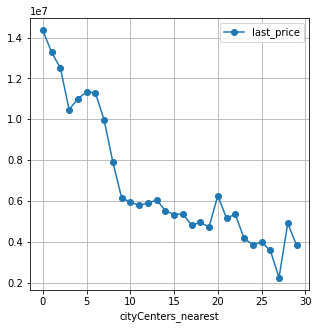

In [56]:

(
    data.query('locality_name == "санкт-петербург"').pivot_table(index='cityCenters_nearest', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()


Вывод
Стоимость при удалении от центра резко падает и остается высокой для квартир до 9 км от центра. Далее при увеличении расстояния стоимость падает не сильно. Повышающиеся значения на удалении 20 и 27 км скорее всего относятся к элитным районам. 

In [57]:
### Общий вывод

В представленном отчете проведен исследовательский анализ данных. Первоначальные данные были проверены на пропуски, дубликаты и аномальные значения. Для более широкого анализа были добавлены столбцы с рассчитанными данными: цена одного квадратного метра, день, месяц и год публикации объявления, тип этажа квартиры и расстояние до центра города в километрах. Параметры объектов были изучены: построены гистограммы, выявлены зависимости и сделаны выводы. 

Медианное время продажи - 95 дней. Среднее время продажи - 181 день. В основном квартиры продаются за срок в 100 дней. Быстрой продажей можно назвать срок в 45 дней и меньше. Долгой продажей - 210 дней (7 месяцев) и дольше. 

На стоимость объявления больше всего влияет площадь квартиры, нежели число комнат.  Квартиры в центре состоят из малого числа комнат, но стоят достаточно высоко. Первый этаж значительно дешевле остальных вариантов. Также стоимость квартиры на последнем этаже ниже, чем на остальных, кроме первого. Большинство вариантов имеют высоту потолков от 2,5 до 3 метров. Наиболее распространенные варианты находятся в пятиэтажках.

Самые распространенные дни публикаций – рабочие, самый «дорогой» день - пятница. В субботу и воскресенье размещение объявлений происходило практически в два раза реже и цены дешевле, чем в рабочие. 

Самый распространенный месяц публикаций – декабрь. В сентябре и в декабре стоимость размещения наиболее высокая. Цены на квартиры были наиболее высокими в 2014 году и до 2018 г снижалась. В 2019 г. цены стали повышаться.

Населенные пункты с самой высокой стоимостью квадратного метра - Санкт-Петербург и Пушкин. 
Населенный пункт с самой низкой стоимостью квадратного метра - Выборг.

Стоимость квартиры при удалении от центра резко падает, но остается высокой для квартир с удалением до 9 км от центра. Далее при увеличении расстояния стоимость уменьшается незначительно. В представленной выборке есть высокие значения цен, которые относятся скорее всего к элитным районам.
